# NaiveBayes 

# 1. Importing libraries

In [25]:
import numpy  as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, plot_precision_recall_curve,plot_roc_curve,plot_confusion_matrix,confusion_matrix,accuracy_score,roc_curve, auc
import matplotlib.pyplot as plt
import emoji
print(emoji.emojize("Let's get started! :rocket:"))

Let's get started! 🚀


# 2. Reading data from file 

In [26]:
df = pd.read_csv (r'data.csv')
df 

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


# 3. Pre-processing for data

## 3.1 Box-plot of age variable

<function matplotlib.pyplot.show(close=None, block=None)>

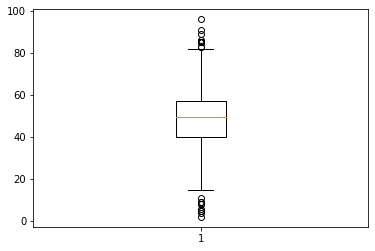

In [27]:
# Draw box-plot for the age variable 
plt.boxplot(df['age'])
plt.show
# we have found that above 78 and below 79 are outliers 

## 3.2 Calculate upper and lower bounds

In [28]:
# **Get outliers and remove it**

# finding the 1st quartile
q1 = np.quantile(np.array(df['age']), 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(np.array(df['age']), 0.75)
med = np.median(np.array(df['age']))
 
# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)

82.5
14.5


## 3.3 Remove rows with outlier values 

863
Total number of age outliers removed: 27
836


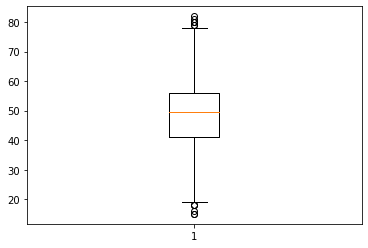

In [29]:
count = 0
print(len(df['age']))
for i in range(len(df['age'])):
  if df['age'][i] >= upper_bound or df['age'][i] <= lower_bound: # check boundary values 82.5 and 14.5
    count = count + 1
    df = df.drop(axis = 0, labels = i) # Remove rows includes outlier 
print(f"Total number of age outliers removed: {count}")

print(len(df['age']))
# Graph of the modified box-plot for age 
plt.boxplot(df['age'])
plt.show
df = df.reset_index(drop=True) # To reset the index after removal of rows 


## 3.4 Removing symptom6  and Unnamed: 0 variables

In [30]:
# symptom6 attribute is has almost one identical value 

print(f"Number of rows: {len(df['symptom6'])}")
counter_1 = 0
counter_2 = 0
for i in range(len(df['symptom6'])):
  if df['symptom6'][i] == 1:
    counter_1 = counter_1 + 1
  else:
    counter_2 = counter_2 + 1
print(f"Number of cases with first value: {counter_1}")
print(f"Number of cases with Second value: {counter_2}")
print(emoji.emojize('Useless variable :collision:'))
df.drop(axis = 1, labels = 'symptom6', inplace = True)
df.drop(axis = 1, labels = 'Unnamed: 0', inplace = True)

Number of rows: 836
Number of cases with first value: 835
Number of cases with Second value: 1
Useless variable 💥


## 3.5 Removing negative values from our data frame

In [31]:
# Removing rows with negative values
print(len(df['age']))
for i in range(len(df['age'])):
    if (df['diff_sym_hos'][i] < 0):
        df = df.drop(axis = 0, labels = i) # Remove rows includes outlier 
df = df.reset_index(drop=True) # To reset the index after removal of rows 

print(len(df['age']))

df

836
834


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,48,3,2,24.0,0,0,14,31,19,12,3,0,1
830,0,0,2,35.0,0,0,14,31,19,12,3,0,0
831,3,1,1,49.4,0,0,14,31,19,12,3,0,0
832,24,9,1,49.4,0,0,14,31,19,12,3,0,0


## 3.6 Converting age into categorical variable 

In [32]:
df.age = pd.cut(df.age,bins=[0,2,17,65,99],labels=[0, 1, 2, 3])

## 3.7 Converting diff_sym_hos into categorical variable

In [33]:
df.diff_sym_hos = pd.cut(np.array(df.diff_sym_hos),bins=[0,2,5,9,20],labels=[0, 1, 2, 3],include_lowest=True)

## 3.8 Correlation between variables 

<AxesSubplot:>

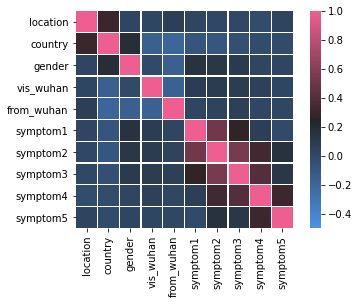

In [34]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths= 0.2)
# Sadly, there is no strong correlation between any two variables! 
# Happily, we are using naive BAYES :)

# 4. Splitting of data into parts

In [35]:
# Labels for our pandas data frame
x_labels = ['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','diff_sym_hos']
y_label = ['result']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(df[x_labels],df[y_label], test_size = 0.2, random_state = 100)

# Split the training into training and validation 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100) 

X_train = X_train.reset_index(drop=True) 
X_validate = X_validate.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 
y_validate = y_validate.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

# 5. Naive Bayes Training model 

## 5.1 Categorical Naive bayes

In [36]:
# Trial 1
clf = CategoricalNB(alpha = 4)
clf.fit(X_train, y_train.values.ravel()) #NEED MORE INFO 
y_pred_v = clf.predict(X_validate)
print(classification_report(y_validate,y_pred_v))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        59
           1       0.50      0.12      0.20         8

    accuracy                           0.88        67
   macro avg       0.70      0.55      0.57        67
weighted avg       0.85      0.88      0.85        67



In [37]:
# Trial 2
clf = CategoricalNB(alpha = 2)
clf.fit(X_train, y_train.values.ravel()) #NEED MORE INFO 
y_pred_v = clf.predict(X_validate)
print(classification_report(y_validate,y_pred_v))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        59
           1       0.33      0.25      0.29         8

    accuracy                           0.85        67
   macro avg       0.62      0.59      0.60        67
weighted avg       0.83      0.85      0.84        67



In [38]:
# Trial 3
clf = CategoricalNB(alpha = 0.2)
clf.fit(X_train, y_train.values.ravel()) #NEED MORE INFO 
y_pred_v = clf.predict(X_validate)
print(classification_report(y_validate,y_pred_v))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        59
           1       0.60      0.75      0.67         8

    accuracy                           0.91        67
   macro avg       0.78      0.84      0.81        67
weighted avg       0.92      0.91      0.91        67



In [39]:
# Trial 4
clf = CategoricalNB(alpha = 0.01)
clf.fit(X_train, y_train.values.ravel()) #NEED MORE INFO 
y_pred_v = clf.predict(X_validate)
print(classification_report(y_validate,y_pred_v))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.67      0.75      0.71         8

    accuracy                           0.93        67
   macro avg       0.82      0.85      0.83        67
weighted avg       0.93      0.93      0.93        67



In [40]:
# Testing 
clf = CategoricalNB(alpha = 0.01)
clf.fit(X_train, y_train.values.ravel()) #NEED MORE INFO 
y_pred = clf.predict(X_test)

## 5.2 Multinomial Naive bayes

In [41]:
clf_m = MultinomialNB()
clf_m.fit(X_train, y_train.values.ravel()) #NEED MORE INFO 
y_pred_m = clf.predict(X_test)

## 5.3 Categorical Naive bayes + Grid searhc CV with hyper-paramters tuning

In [42]:
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 0.2, 0.05, 0.6, 0.001, 0.3, 0.02],
}

nbModel_grid = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X_train, y_train.values.ravel())
print(nbModel_grid.best_params_)
y_pred_CV = nbModel_grid.predict(X_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
{'alpha': 0.01}


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


# 6 Performance metrics 

## 6.1 Percision, Recall, F1-Score

### 6.1.1 Categorical Naive bayes performance

In [43]:
# percision, Recall, F1-score
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.50      0.67      0.57        15

    accuracy                           0.91       167
   macro avg       0.73      0.80      0.76       167
weighted avg       0.92      0.91      0.92       167



### 6.1.2 Multinomial Naive bayes performance

In [44]:
# percision, Recall, F1-score
print(classification_report(y_test,y_pred_m))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.50      0.67      0.57        15

    accuracy                           0.91       167
   macro avg       0.73      0.80      0.76       167
weighted avg       0.92      0.91      0.92       167



### 6.1.3 Naive bayes + Grid search optimization performance 

In [45]:
# percision, Recall, F1-score
print(classification_report(y_test,y_pred_CV))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.50      0.67      0.57        15

    accuracy                           0.91       167
   macro avg       0.73      0.80      0.76       167
weighted avg       0.92      0.91      0.92       167



## 6.2 ROC/AUC curves 

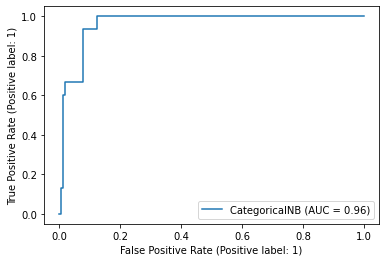

In [46]:
plot_roc_curve(clf,X_test,y_test) # Hyper-parameters tuning manually 

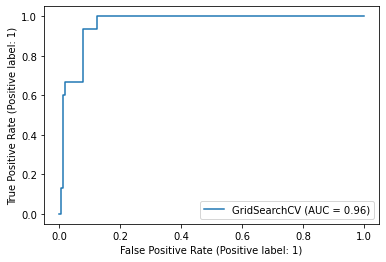

In [47]:
plot_roc_curve(nbModel_grid,X_test,y_test) # Hyper-parameters tuning using GridsearchCV 